In [6]:
import pathlib
import datetime


import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
path = pathlib.Path('~/src/sealevel/data/imbie/imbie_dataset-2018_07_23.xlsx').expanduser()
# Make sure you have xlrd  installed
sheets = pd.read_excel(path, sheet_name=None)
dfs = []
for name, df in sheets.items():
    df['location'] = name
    dfs.append(df)
antarctica_df = pd.concat(dfs)

In [9]:
antarctica_df.head()

,Year,Cumulative ice mass change (Gt),Cumulative ice mass change uncertainty (Gt),Cumulative sea level contribution (mm),Cumulative sea level contribution uncertainty (mm),location
0,1992.000000,4.408333,7.221207,-0.012245,0.020059,Antarctica
1,1992.083333,11.475004,50.029991,-0.031875,0.138972,Antarctica
2,1992.166667,19.650000,53.064819,-0.054583,0.147402,Antarctica
3,1992.250000,10.594821,59.023007,-0.029430,0.163953,Antarctica
4,1992.333333,9.460705,65.012377,-0.026280,0.180590,Antarctica


In [10]:
path = pathlib.Path('/Users/baart_f/src/sealevel/data/imbie/imbie_dataset_greenland_dynamics-2019_12_10.xlsx').expanduser()

sheets = pd.read_excel(path, sheet_name=None)
dfs = []
for name, df in sheets.items():
    df['location'] = name
    dfs.append(df)
greenland_df = pd.concat(dfs)

In [11]:
greenland_df.head()


,Year,Rate of ice sheet mass change (Gt/yr),Rate of ice sheet mass change uncertainty (Gt/yr),Cumulative ice sheet mass change (Gt),Cumulative ice sheet mass change uncertainty (Gt),Cumulative surface mass balance anomaly (Gt),Cumulative surface mass balance anomaly uncertainty (Gt),Cumulative ice dynamics anomaly (Gt),Cumulative ice dynamics anomaly uncertainty (Gt),Unnamed: 9,Rate of ice sheet mass change (mm sea level/yr),Rate of ice sheet mass change uncertainty (mm sea level/yr),Cumulative ice sheet mass change (mm sea level),Cumulative ice sheet mass change uncertainty (mm sea level),Cumulative surface mass balance anomaly (mm sea level),Cumulative surface mass balance anomaly uncertainty (mm sea level),Cumulative ice dynamics anomaly (mm sea level),Cumulative ice dynamics anomaly uncertainty (mm sea level),location
0,1980,NaN,NaN,NaN,NaN,86.929102,56.074177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.241470,0.155762,NaN,NaN,Greenland Dynamics
1,1981,NaN,NaN,NaN,NaN,-18.973639,91.635141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052705,0.254542,NaN,NaN,Greenland Dynamics
2,1982,NaN,NaN,NaN,NaN,-119.991411,117.299283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333309,0.325831,NaN,NaN,Greenland Dynamics
3,1983,NaN,NaN,NaN,NaN,-95.637551,140.219610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.265660,0.389499,NaN,NaN,Greenland Dynamics
4,1984,NaN,NaN,NaN,NaN,17.455224,160.752967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.048487,0.446536,NaN,NaN,Greenland Dynamics


In [12]:
antarctica_selected = antarctica_df[antarctica_df.location=='Antarctica']
antarctica_ci = antarctica_selected['Cumulative sea level contribution uncertainty (mm)']
antarctica_slr = antarctica_selected['Cumulative sea level contribution (mm)']




In [13]:
greenland_selected = greenland_df[greenland_df.location == 'Greenland Dynamics']
greenland_slr = greenland_selected['Cumulative ice sheet mass change (mm sea level)']
greenland_ci = greenland_selected['Cumulative ice sheet mass change uncertainty (mm sea level)']

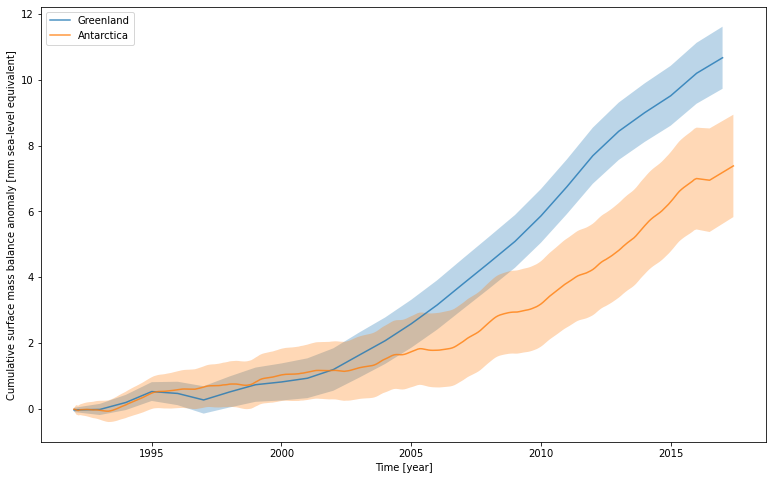

In [14]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.fill_between(greenland_selected['Year'], greenland_slr - greenland_ci, greenland_slr + greenland_ci, alpha=0.3)
ax.plot(greenland_selected['Year'], greenland_slr, alpha=0.8, label='Greenland')
ax.fill_between(antarctica_selected['Year'], antarctica_slr - antarctica_ci, antarctica_slr + antarctica_ci, alpha=0.3)
ax.plot(antarctica_selected['Year'], antarctica_slr, alpha=0.8, label='Antarctica')
ax.set_ylabel('Cumulative surface mass balance anomaly [mm sea-level equivalent]')
ax.set_xlabel('Time [year]')
ax.legend(loc='upper left');


In [13]:
import ee

In [14]:
ee.Initialize()

In [19]:
grace_land = ee.ImageCollection("NASA/GRACE/MASS_GRIDS/LAND")
antarctica = ee.Geometry.MultiPolygon(
        [[[[-180, -58],
           [-180, -90],
           [0, -90],
           [0, -58]]],
         [[[0, -58],
           [0, -901],
           [180, -90],
           [180, -58]]]], None, True)
greenland = ee.Geometry.Polygon(
        [[[-72.43977570253338, 79.32383883021862],
          [-74.3640680845993, 77.69407430076578],
          [-69.11465536077975, 74.87884333546832],
          [-59.598443084599296, 73.07548797936632],
          [-57.489068084599296, 63.93985411420621],
          [-44.832818084599296, 57.043802821920835],
          [-36.395318084599296, 62.99772320136553],
          [-29.012505584599296, 66.72477348126094],
          [-19.52031808459924, 68.97619016554378],
          [-15.30156808459924, 72.02147236458458],
          [-14.59844308459924, 76.80202844978761],
          [-9.32500558459924, 80.20961277723778],
          [-10.02813058459924, 82.0950195376816],
          [-18.11406808459924, 82.47256887158471],
          [-24.09063058459924, 83.65817793891526],
          [-37.450005584599296, 83.8116325974187],
          [-53.973443084599296, 82.96259008242481],
          [-66.9812555845993, 80.84580010699196]]])

def mean(i, geometry):
    # compute  mean for geometry
    mean = i.reduceRegion(
      reducer=ee.Reducer.mean(),
      geometry=geometry, 
      scale=10000, 
      crs='EPSG:4326',
      maxPixels=5e9
    )
    # add time
    mean = mean.set('t', i.get('system:time_start'))
    result = ee.Feature(None, mean)
    return result
result_antarctica = grace_land.map(lambda i: mean(i, antarctica)).getInfo()
result_greenland = grace_land.map(lambda i: mean(i, greenland)).getInfo()


In [20]:
for feature in result_antarctica['features']:
    feature['properties']['date'] = datetime.datetime.fromtimestamp(feature['properties']['t'] / 1000)
    feature['properties']['location'] = 'Antarctica'
for feature in result_greenland['features']:
    feature['properties']['date'] = datetime.datetime.fromtimestamp(feature['properties']['t'] / 1000)
    feature['properties']['location'] = 'Greenland'

In [21]:
grace_df = pd.concat([
    pd.DataFrame(x['properties'] for x in result_antarctica['features']),
    pd.DataFrame(x['properties'] for x in result_greenland['features'])
])

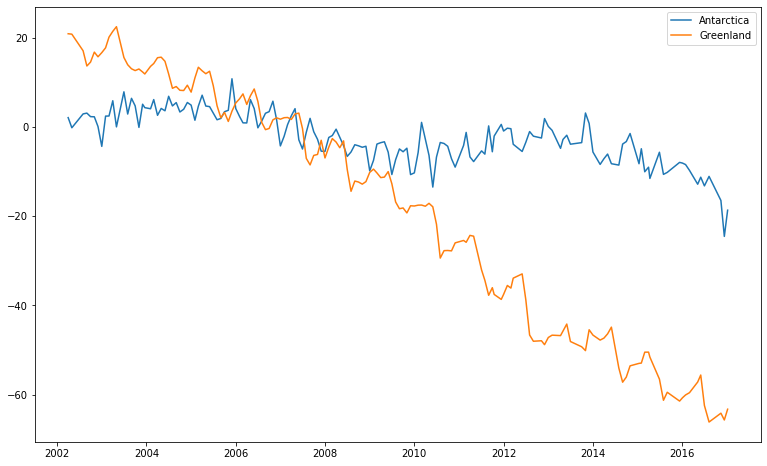

In [22]:
fig, ax = plt.subplots(figsize=(13, 8))

for location, df in grace_df.groupby('location'):
    df = df.sort_values('date')
    ax.plot(df['date'], df['lwe_thickness_jpl'], label=location)
ax.legend()